<a href="https://colab.research.google.com/github/eccecarreon/Prediction-of-Product-Sales/blob/main/Project1_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Prediction of Sales

- Author: Elleryn Christine Carreon


## Project Overview



>> ​The first part will involve creating a GitHub repository specifically for this project. You will also create a Colab Notebook with headers for each of the steps in the project. You will return to this notebook each week and will continue to update the repository as you make changes and additions to the project.

1.   Create a GitHub account
2.   Set up a GitHub repository that will house your first portfolio project
  - Follow the instructions in the video below to help you complete this task! As you follow the video,
    - Title your repository "Prediction of Product Sales"
    - This first project will be a sales prediction for food items sold at various stores. We want to avoid calling this something vague like "project1." Remember, this will be used to show potential employers your data science skills!
    - Be sure to check the box to include a Readme
3. Start a new Colab Notebook with the same title as the repository: "Prediction of Product Sales"
  - Add Markdown cells with your name and section headers to the notebook. While you will only work on the first section in this first assignment, it is very helpful to provide scaffolding for yourself as you move forward with the project over the coming weeks. Using markdown, recall that:
  - The number of "#" followed by a space indicates the header level.
  - "-" followed by a space will add a bullet.  ​
  - **You should have headers/sections for**:
    - Project Title: (Prediction of Product Sales).
      - Author: Include your name in a markdown cell immediately below your header.
  - Be sure to put each header in a new markdown cell.​
    - "Project Overview"
    - "Load and Inspect Data"
    - "Clean Data"
    - "Exploratory Data Analysis"
    - "Feature Inspection"

>> ​The second part will involve loading and cleaning the data.

>> The third part will involve exploring the data through different visualizations.

### Here is the Data Dictionary for this dataset:

Variable Name -	Description

* Item_Identifier - Product ID

* Item_Weight	- Weight of product

* Item_Fat_Content - Whether the product is low-fat or regular

* Item_Visibility	- The percentage of total display area of all products in a store allocated to the particular product

* Item_Type - The category to which the product belongs

* Item_MRP - Maximum Retail Price (list price) of the product

* Outlet_Identifier	- Store ID

* Outlet_Establishment_Year	- The year in which store was established

* Outlet_Size	- The size of the store in terms of ground area covered

* Outlet_Location_Type	- The type of area in which the store is located

* Outlet_Type	- Whether the outlet is a grocery store or some sort of supermarket

* Item_Outlet_Sales	- Sales of the product in the particular store. This is the target variable to be predicted.

## Clean Data

>> We will continue to work off of the GitHub repository you created last week for your first portfolio project. The goal of your portfolio projects are to have items to show potential employers that demonstrate your data science skills and competencies.

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

For Part 2, your task is to use Pandas to load in the data and start exploring and cleaning it. As data scientists, about 80% of our time is spent on data preparation - so this is a very important step!

- Download the data using this link: https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view?usp=sharing

Original data source: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

- Insert code below the heading "Loading Data"
  - Use Pandas to read the sales prediction data set into Google Colab.
  - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
  - Explore the data - what do you need to do to clean this data? Clean it!
  - Be sure to address each of the tasks!

### Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fname = ('/content/drive/MyDrive/Colab Notebooks/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv')
df = pd.read_csv(fname)

1) How many rows and columns?

2) What are the datatypes of each variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


There are 8523 rows and 12 columns.

All columns have 8523 entries except for Item_Weight with 7060, and Outlet_Size with 6113.

There are 5 numeric columns and 7 categorical, string columns.

In [ ]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8513,FDH31,12.000,Regular,0.020407,Meat,99.9042,OUT035,2004,Small,Tier 2,Supermarket Type1,595.2252
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [ ]:
df.select_dtypes(include=['object']).head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
df.select_dtypes(include=['number']).head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


### Data Cleaning

3) Are there duplicates? If so, drop any duplicates.

In [ ]:
duplicates = df.duplicated().any()
duplicates

# No duplicates

False

In [ ]:
df[df.duplicated(keep=False)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


4) Identify missing values.



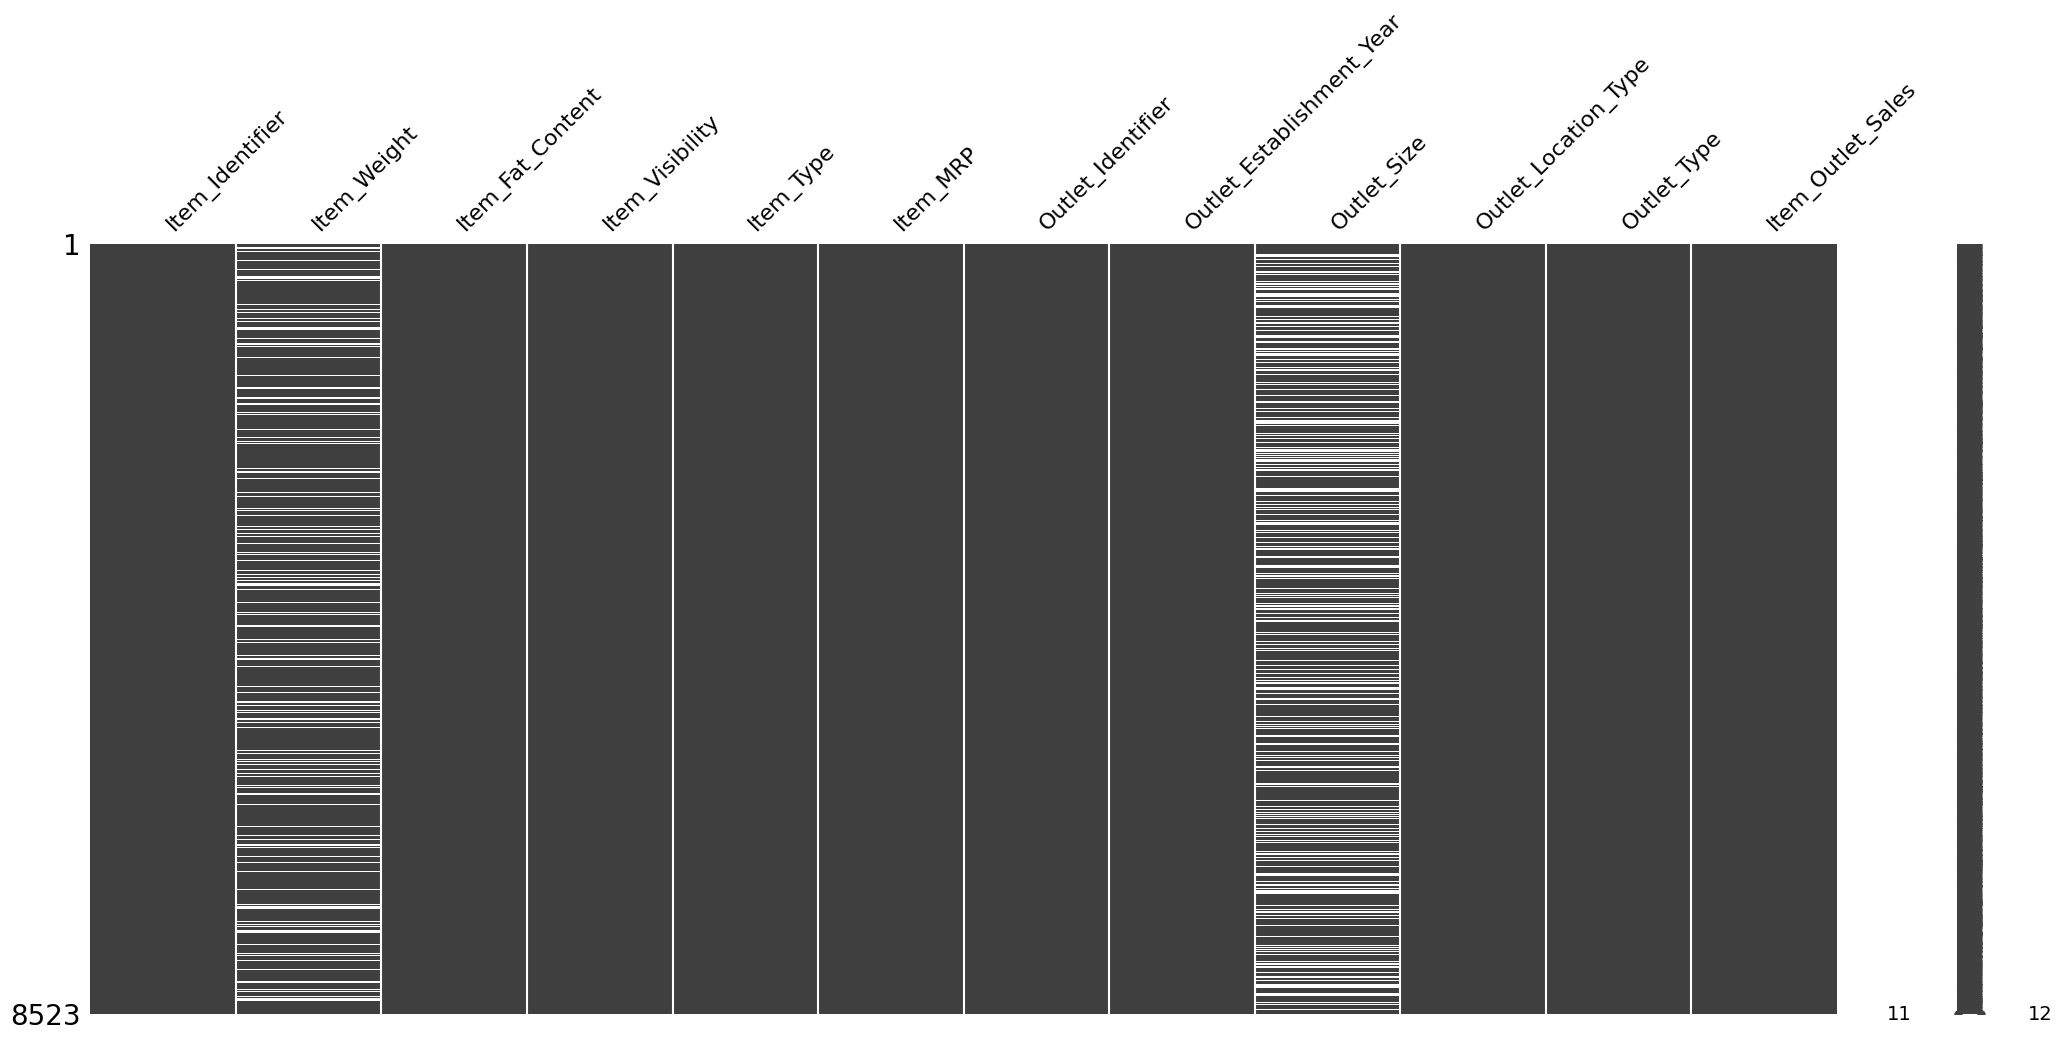

In [ ]:
msno.matrix(df);

5) Address the missing values by using a placeholder value.

In [ ]:
null_cols = df.isna().sum()

In [ ]:
null_cols/ len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].replace({'NaN':''})

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_cols] = df[cat_cols].fillna("MISSING")

In [ ]:
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].astype(object)
df['Outlet_Size'].dtype

dtype('O')

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df['Item_Weight'] = df['Item_Weight'].replace({'NaN':''})

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(999)

In [ ]:
df['Item_Weight'].value_counts()

999.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64

In [ ]:
unique_vals = df.nunique()

In [ ]:
unique_vals/ len(df) * 100

# No need to drop columns at this point.

Item_Identifier              18.291681
Item_Weight                   4.880910
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.046932
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

6) Confirm that there are no missing values after addressing them.

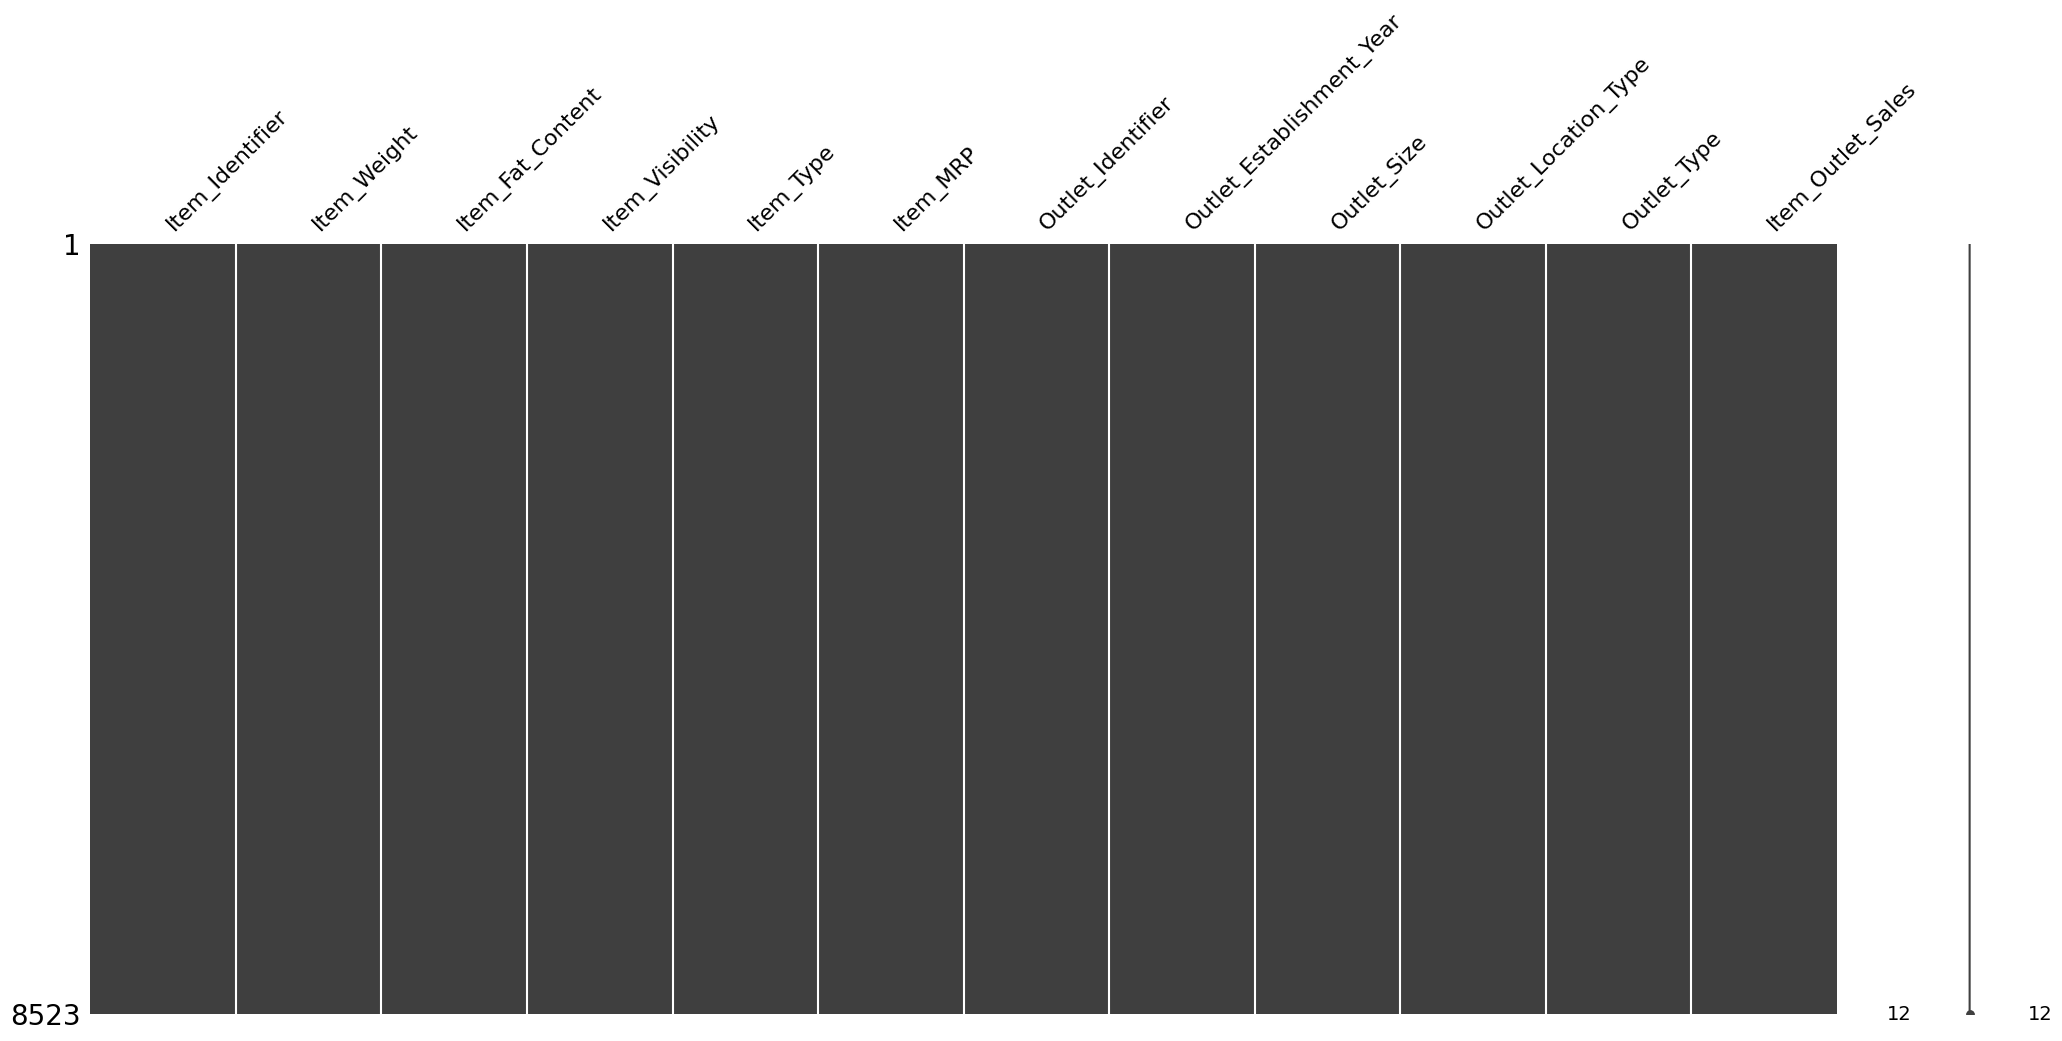

In [ ]:
msno.matrix(df);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
item_fat_content_map = {'LF':'Low Fat',
                        'reg':'Regular',
                        'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(item_fat_content_map)

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,182.13,0.07,140.99,1997.83,2181.29
std,371.90,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,14.50,0.05,143.01,1999.00,1794.33
75%,19.50,0.09,185.64,2004.00,3101.30
max,999.00,0.33,266.89,2009.00,13086.96


In [ ]:
# Save the folder + filename as a variable called fpath
fpath = '/content/drive/MyDrive/Colab Notebooks/CodingDojo/01-Fundamentals/Week02/Data/data-cleaning-project.csv'

# Use to_csv to save the dataframe using the filename
df.to_csv(fpath, index=False)

In [ ]:
pd.read_csv(fpath)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,MISSING,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Exploratory Data Analysis

>> We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the products and outlets that play crucial roles in increasing sales.

For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset.
- Boxplots to view statistical summaries of numerical features in your dataset.
- Countplots to view the frequency of each class of categorial features in your dataset.
- Heatmap to view the correlation between features.

Start updating the README file associated with the project.

- Add text describing the project.
- Select two key visuals of different types that demonstrate a relevant insight into the data.
- Add text with a brief (1 sentence is sufficient) interpretation of the visuals you include.

Please feel free to add more than the minimum. Remember, this is your chance to display your skills!

Commit your work to GitHub.

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
fpath = '/content/drive/MyDrive/Colab Notebooks/CodingDojo/01-Fundamentals/Week02/Data/data-cleaning-project.csv'
df = pd.read_csv(fpath)

In [ ]:
# Changing outlet establishment year to categorical
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype(object)

In [ ]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_cols].value_counts()

Item_Identifier  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            Low Fat           Soft Drinks            OUT010             1998                       MISSING      Tier 3                Grocery Store        1
FDV28            Regular           Frozen Foods           OUT010             1998                       MISSING      Tier 3                Grocery Store        1
FDV32            Low Fat           Fruits and Vegetables  OUT045             2002                       MISSING      Tier 2                Supermarket Type1    1
                                                          OUT035             2004                       Small        Tier 2                Supermarket Type1    1
                                                          OUT019             1985                       Small        Tier 1                Grocery Store        1
                                 

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')



---



### Histograms and Boxplots
>> Histograms to view the distributions of numerical features in your dataset.
>> Boxplots to view statistical summaries of numerical features in your dataset.



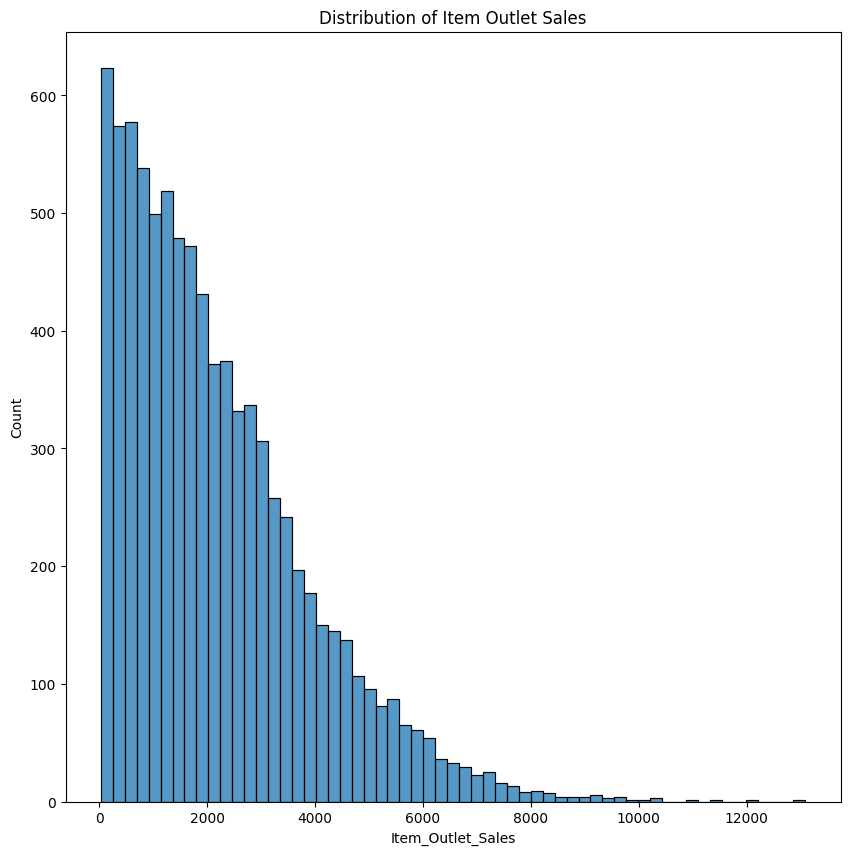

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df, x='Item_Outlet_Sales');
ax.set_title('Distribution of Item Outlet Sales');

Eventhough there items that were sold more, outlet sales were lower in amounts.
It would be interesting to check what these items were, maybe there were less big ticket items sold which were sold at higher prices, thus the higher outlet sales for the items going from 5000 and up.

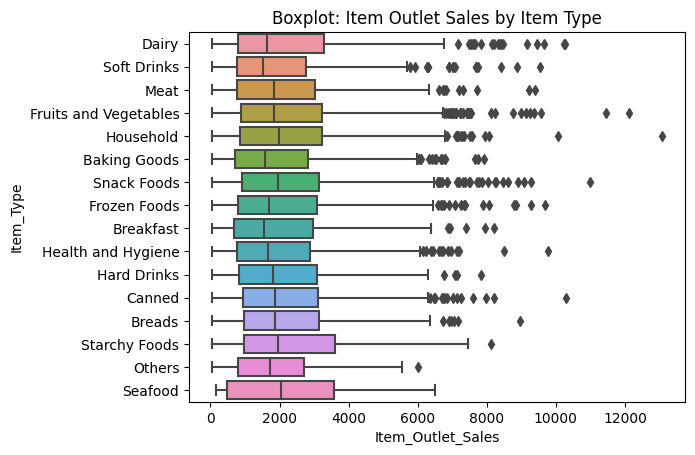

In [ ]:
ax = sns.boxplot(data=df, x='Item_Outlet_Sales', y='Item_Type')
ax.set_title('Boxplot: Item Outlet Sales by Item Type');

Median item outlet sales are at 2000 and below, with outliers whcih might be high ticket items for their category.

In [ ]:
item_outlet_sales.index

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type')

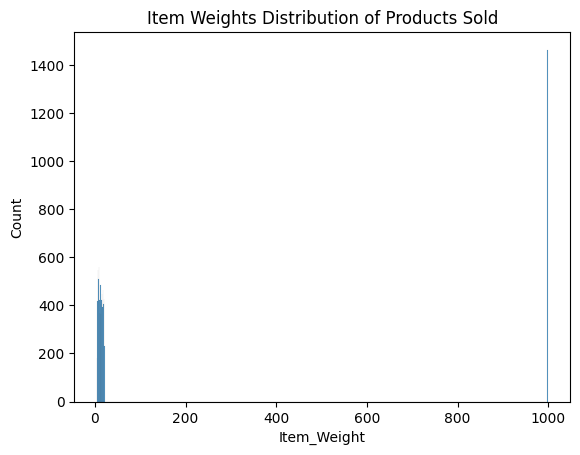

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(data=df, x='Item_Weight')
ax.set_title('Item Weights Distribution of Products Sold');

Item weights are usually less than 50, but there were some at 1000.

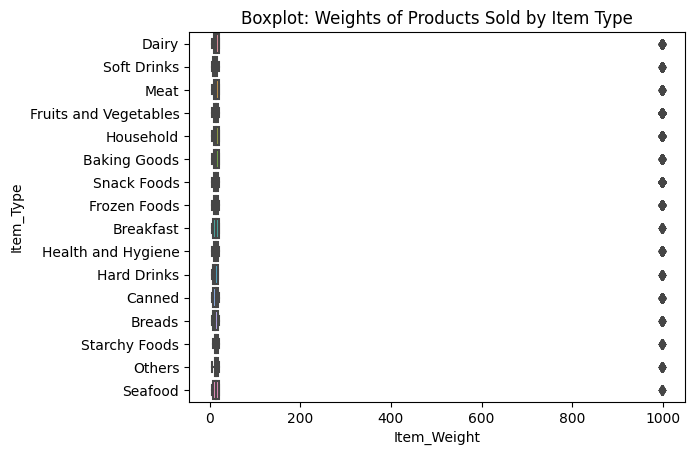

In [ ]:
ax = sns.boxplot(data=df, x='Item_Weight', y='Item_Type')
ax.set_title('Boxplot: Weights of Products Sold by Item Type');

Data suggests that it is common that item weights are less than 50, with some outliers are 1000. We could explore more on which items were at 1000 mark.

In [ ]:
item_weight = df.groupby('Item_Type')['Item_Weight'].mean()
item_weight

Item_Type
Baking Goods             182.821806
Breads                   196.285956
Breakfast                201.048818
Canned                   179.542026
Dairy                    181.060345
Frozen Foods             171.846437
Fruits and Vegetables    183.655065
Hard Drinks              154.463832
Health and Hygiene       183.771529
Household                176.931885
Meat                     217.015165
Others                   200.389941
Seafood                  212.924922
Snack Foods              187.183354
Soft Drinks              169.348202
Starchy Foods            133.525642
Name: Item_Weight, dtype: float64

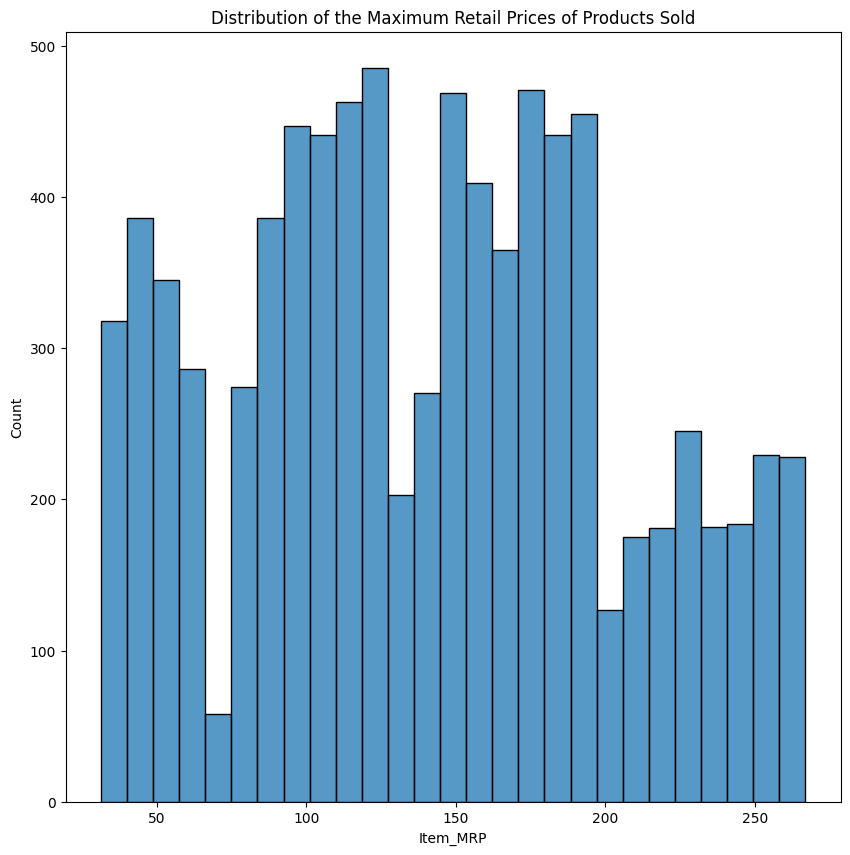

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df, x='Item_MRP')
ax.set_title('Distribution of the Maximum Retail Prices of Products Sold');

There were different distributions of items' maximum retail prices or MRP. It might be good to check by item type or category.

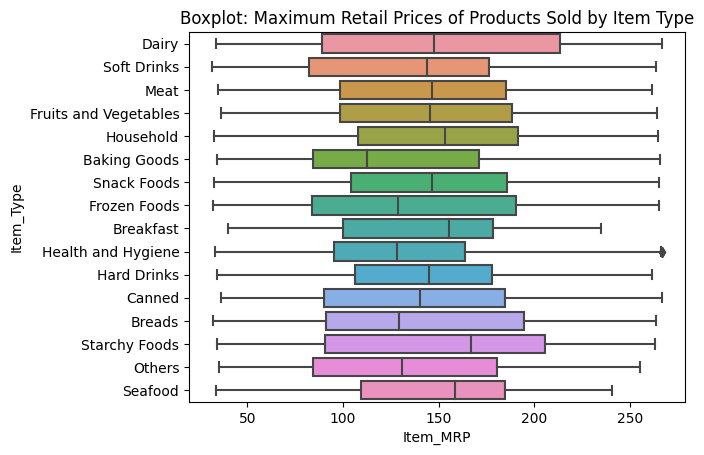

In [ ]:
ax = sns.boxplot(data=df, x='Item_MRP', y='Item_Type');
ax.set_title('Boxplot: Maximum Retail Prices of Products Sold by Item Type');

Looking at the boxplot above, median maximum retail prices for starchy foods are the highest followed by seafood, and the lowest for baking goods.

Health and Hygiene products have some outliers.

In [ ]:
item_max_price = df.groupby('Item_Type')['Item_MRP'].mean()
item_max_price

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64

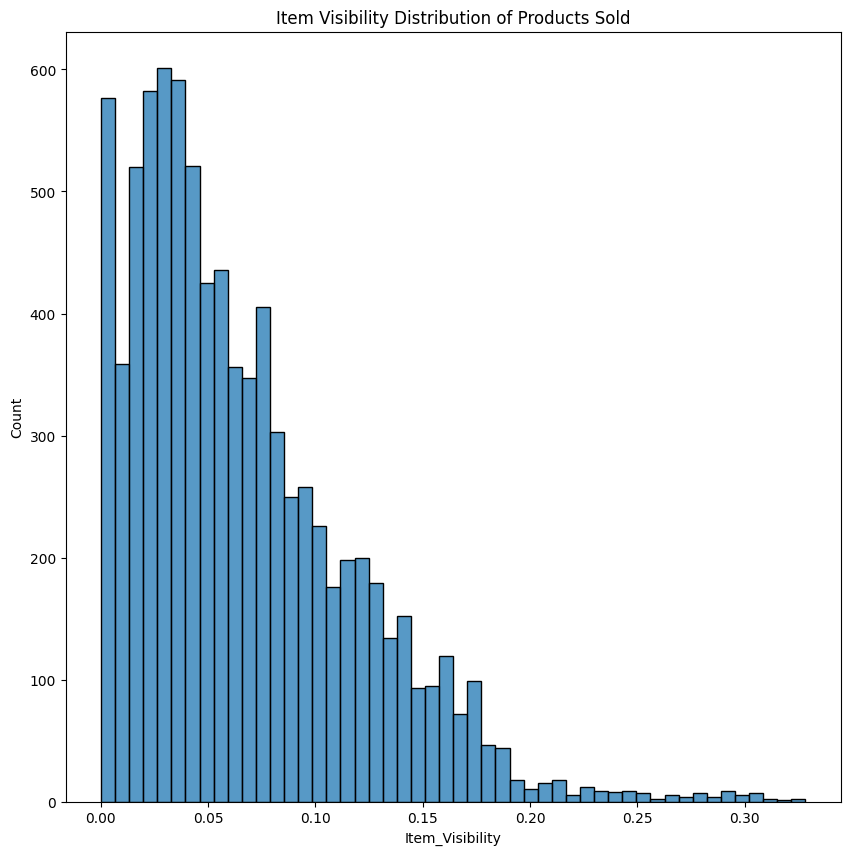

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.histplot(data=df, x='Item_Visibility')
ax.set_title('Item Visibility Distribution of Products Sold');

Most products were visible in stores at less than .05 or 5% of the total display area of all products in a store allocated to that particular product.

It would be interesting to look at the average % visibility by product category or item type.

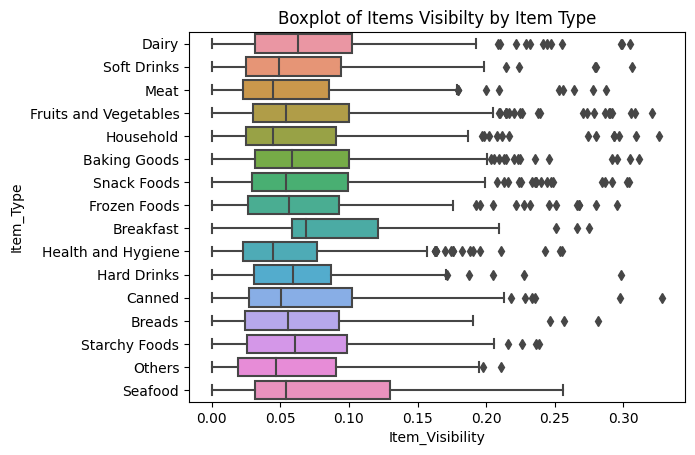

In [ ]:
ax = sns.boxplot(data=df, x='Item_Visibility', y='Item_Type');
ax.set_title('Boxplot of Items Visibilty by Item Type');

Visibility for item categories are usually .10 (10%) or less except for some products under Seafood and Breakfast. There were also a number of outliers for almost all item categories, except Seafood.

In [ ]:
item_visibility = df.groupby('Item_Type')['Item_Visibility'].mean() * 100
item_visibility

Item_Type
Baking Goods             6.916930
Breads                   6.625510
Breakfast                8.572301
Canned                   6.812932
Dairy                    7.242720
Frozen Foods             6.564524
Fruits and Vegetables    6.851294
Hard Drinks              6.494256
Health and Hygiene       5.521598
Household                6.132231
Meat                     6.228381
Others                   6.024103
Seafood                  7.497608
Snack Foods              6.685022
Soft Drinks              6.397225
Starchy Foods            6.756356
Name: Item_Visibility, dtype: float64

### Countplots for Categorical Features


In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

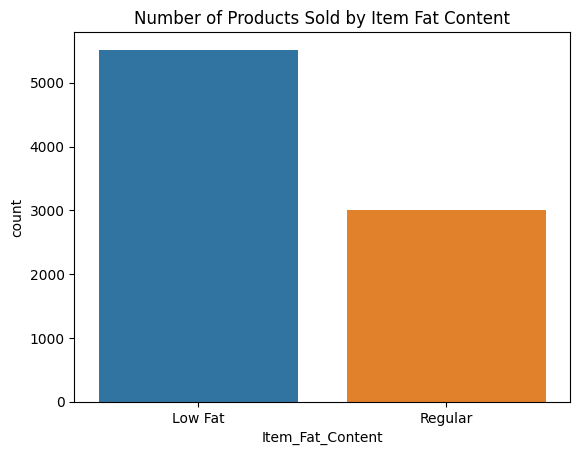

In [ ]:
ax = sns.countplot(data=df, x='Item_Fat_Content')
ax.set_title('Number of Products Sold by Item Fat Content');

There are more products that have low fat content versus those who have regular fat content.

In [ ]:
val_counts_item_type = df['Item_Type'].value_counts()
val_counts_item_type

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

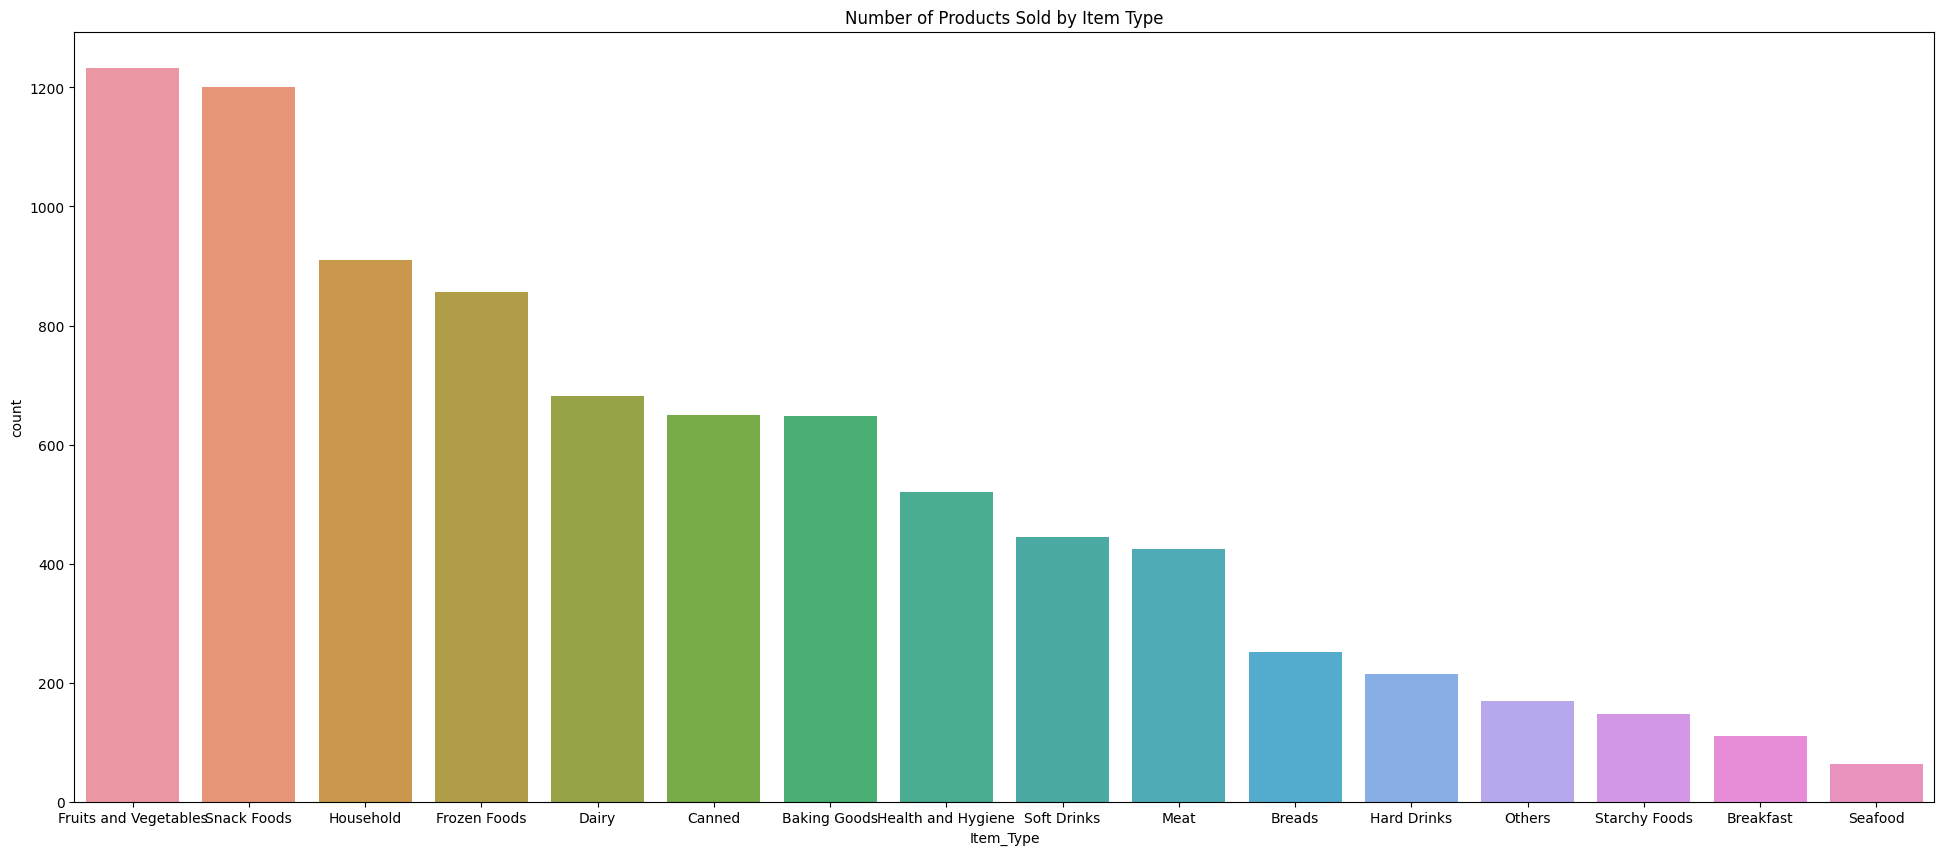

In [ ]:
fig, ax = plt.subplots(figsize=(24,10))
ax = sns.countplot(data=df, x='Item_Type', order=val_counts_item_type.index)
ax.set_title('Number of Products Sold by Item Type');

The highest number of products sold are Fruits and Vegetables followed by Snack Foods.

The lowest number of products sold are Seafood and Breakfast items.

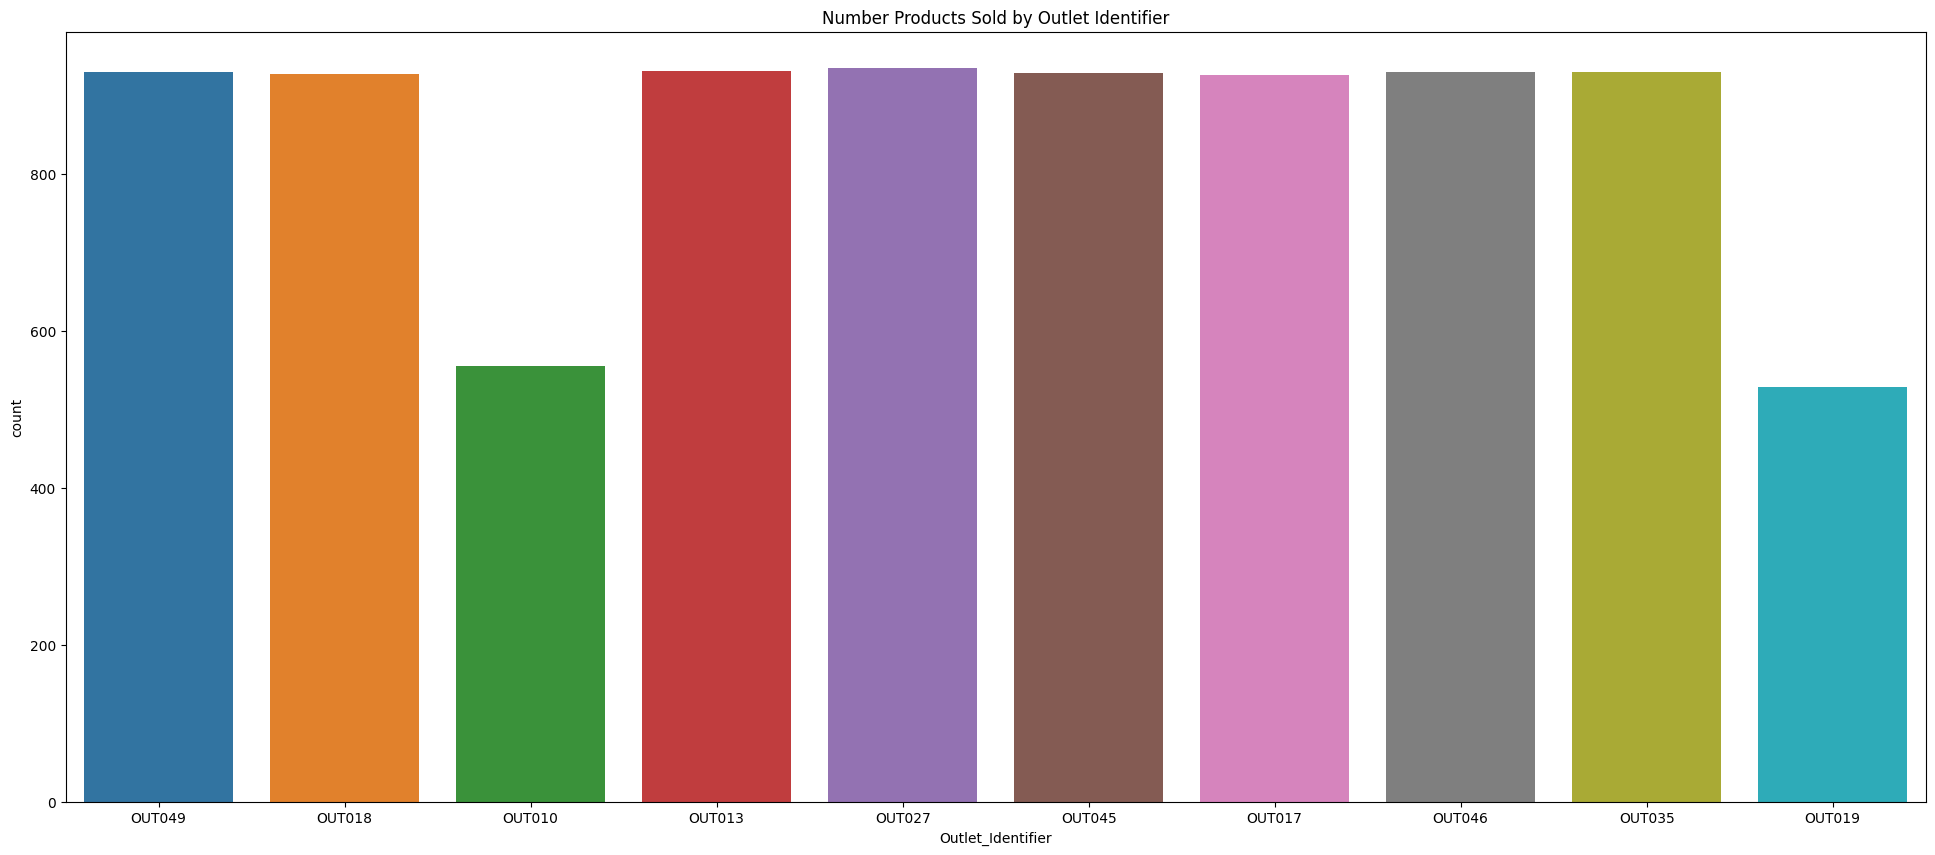

In [ ]:
fig, ax = plt.subplots(figsize=(24,10))
ax = sns.countplot(data=df, x='Outlet_Identifier')
ax.set_title('Number Products Sold by Outlet Identifier');

OUT027 (935 items) have the highest number of products sold followed by OUT013 (932 items). The outlets with the lowest number of products sold are OUT019 (528 items) and OUT010 (555 items).

We can check the average outlet sales or total sales.

In [ ]:
df.value_counts('Outlet_Identifier')

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
dtype: int64

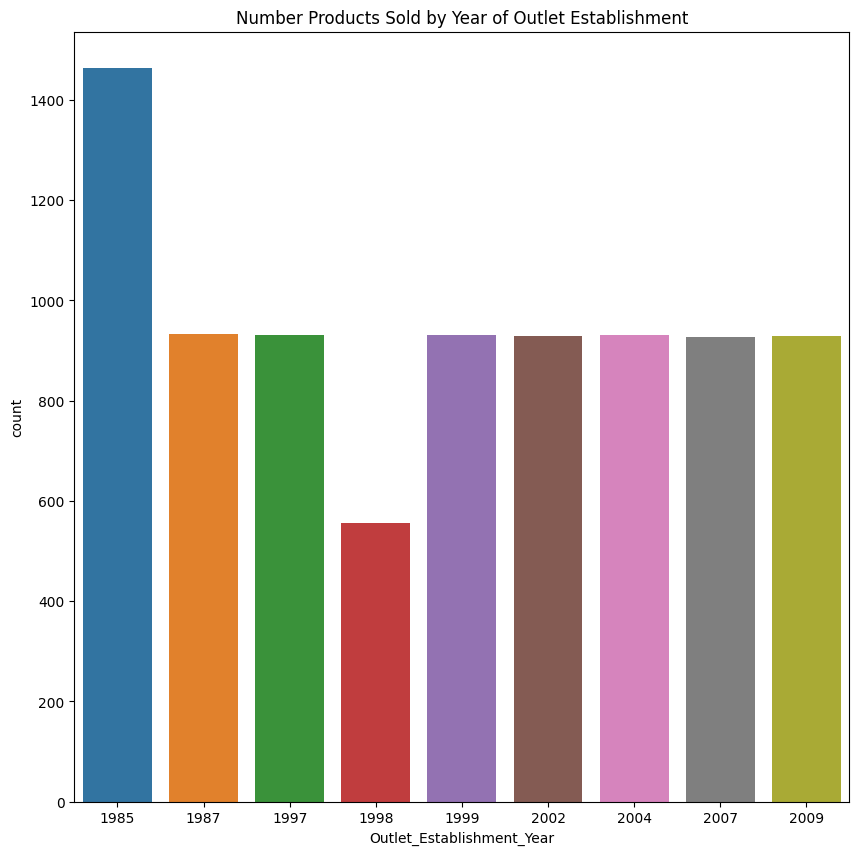

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(data=df, x='Outlet_Establishment_Year')
ax.set_title('Number Products Sold by Year of Outlet Establishment');

Outlets established in 1985 have the highest number of products sold, while outlets built in 1998 have the lowest.

In [ ]:
val_counts_size = df['Outlet_Size'].value_counts()
val_counts_size

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
val_counts_size.index

Index(['Medium', 'MISSING', 'Small', 'High'], dtype='object')

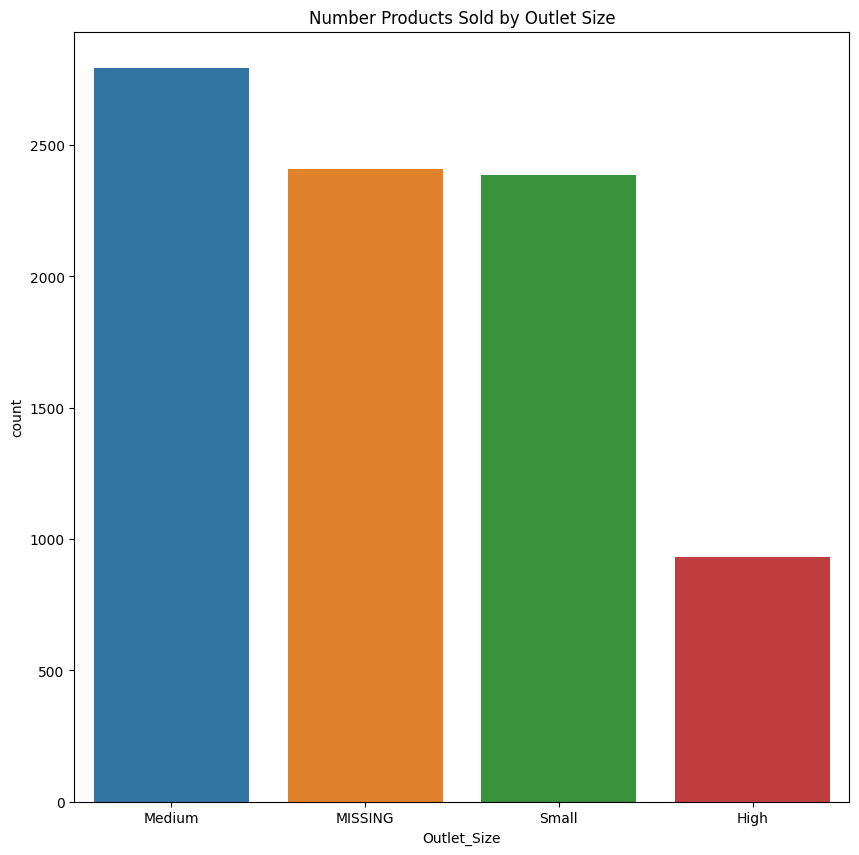

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(data=df, x='Outlet_Size', order=val_counts_size.index)
ax.set_title('Number Products Sold by Outlet Size');

Medium outlets have the highest number of products sold.

In [ ]:
val_counts_loc = df['Outlet_Location_Type'].value_counts()
val_counts_loc

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
val_counts_loc.index

Index(['Tier 3', 'Tier 2', 'Tier 1'], dtype='object')

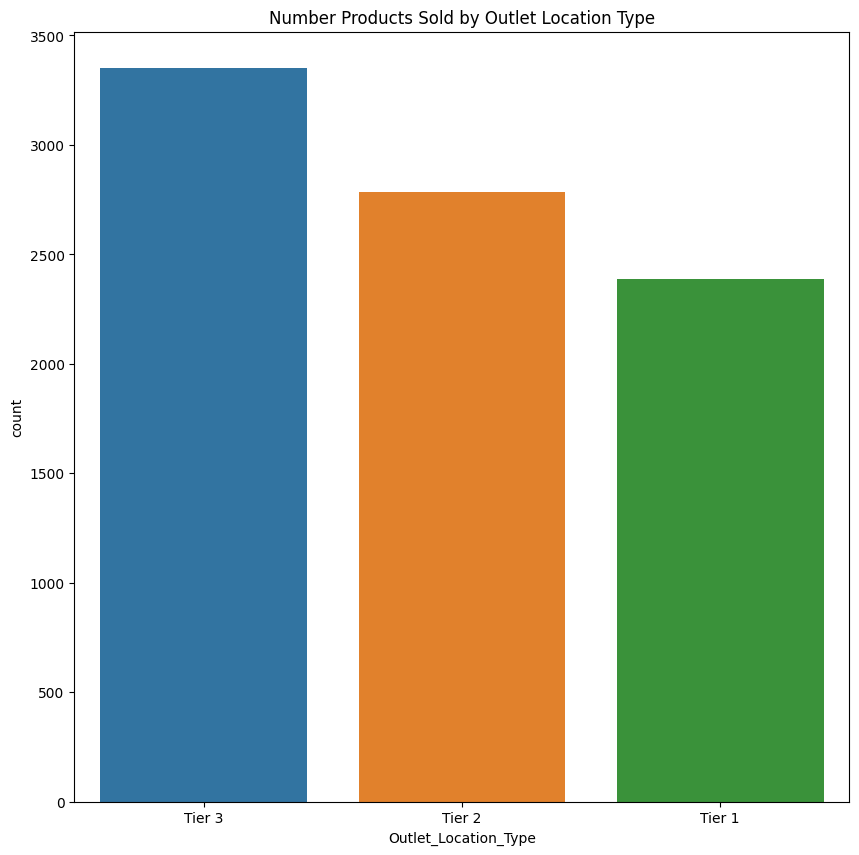

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(data=df, x='Outlet_Location_Type', order=val_counts_loc.index)
ax.set_title('Number Products Sold by Outlet Location Type');

Outlets from Tier 3 have the highest number of products sold.

One thing we can explore is: are item outlet sales the highest as well?

In [ ]:
val_counts_type = df['Outlet_Type'].value_counts()
val_counts_type

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
val_counts_item_type.index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

In [ ]:
val_counts_type.index

Index(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'],
      dtype='object')

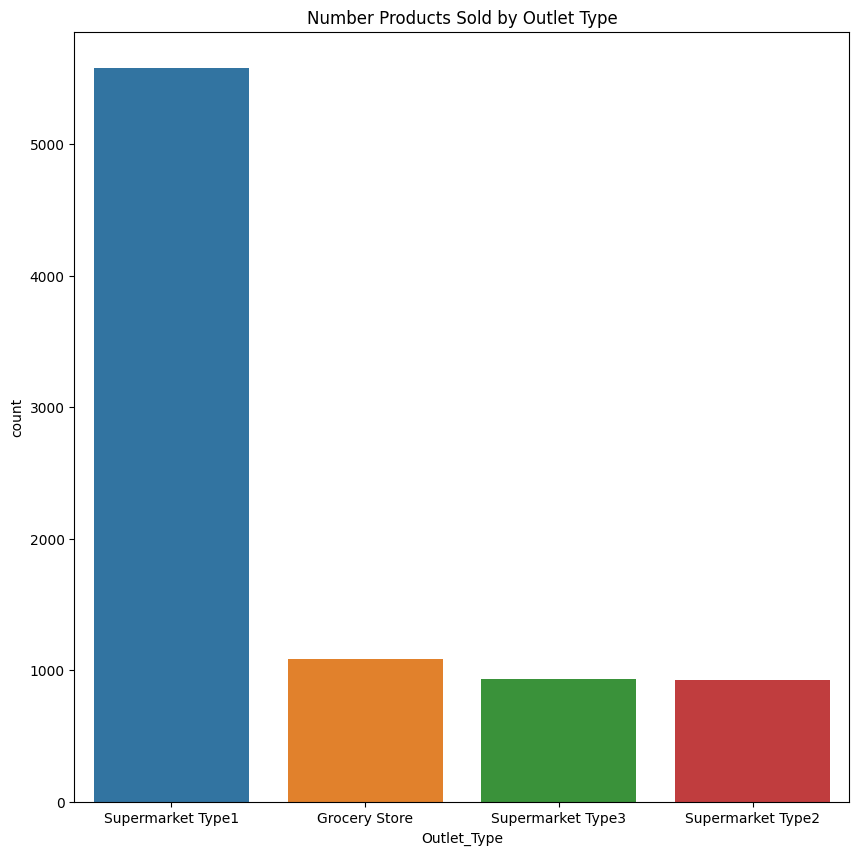

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.countplot(data=df, x='Outlet_Type', order=val_counts_type.index)
ax.set_title('Number Products Sold by Outlet Type');

Type 1 Supermarkets have the highest number of products sold.

### Correlation
>> Heatmap to view the correlation between features.

Correlation coefficient:
- Greater than 0.7: "strong."
- Between 0.5 and 0.7: "moderate."
- Between 0.3 and 0.5: "low"

In [ ]:
# Get correlations
corr = df.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.00,0.09,-0.01,0.08
Item_Visibility,0.09,1.00,-0.00,-0.13
Item_MRP,-0.01,-0.00,1.00,0.57
Item_Outlet_Sales,0.08,-0.13,0.57,1.00


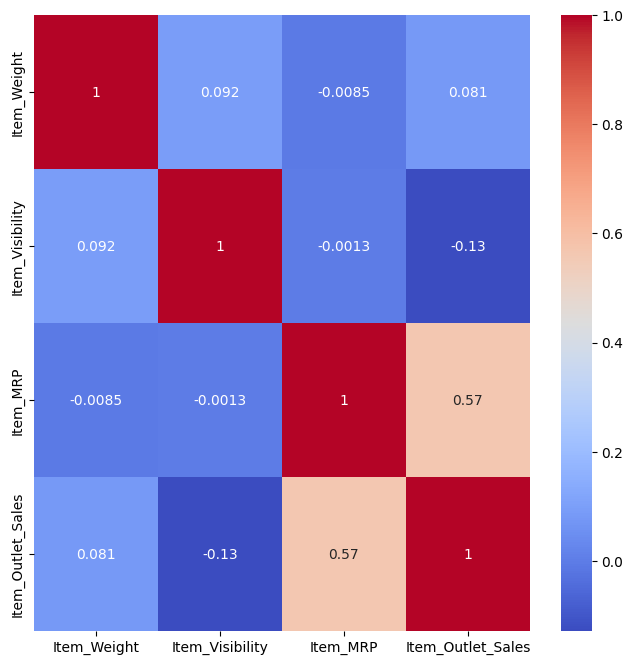

In [ ]:
# Make a heatmap of correlations
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, cmap = 'coolwarm', annot=True);

Item_MRP and Item_Outlet_Sales have positive moderate correlation.

### Other Graphs

In [ ]:
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [ ]:
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

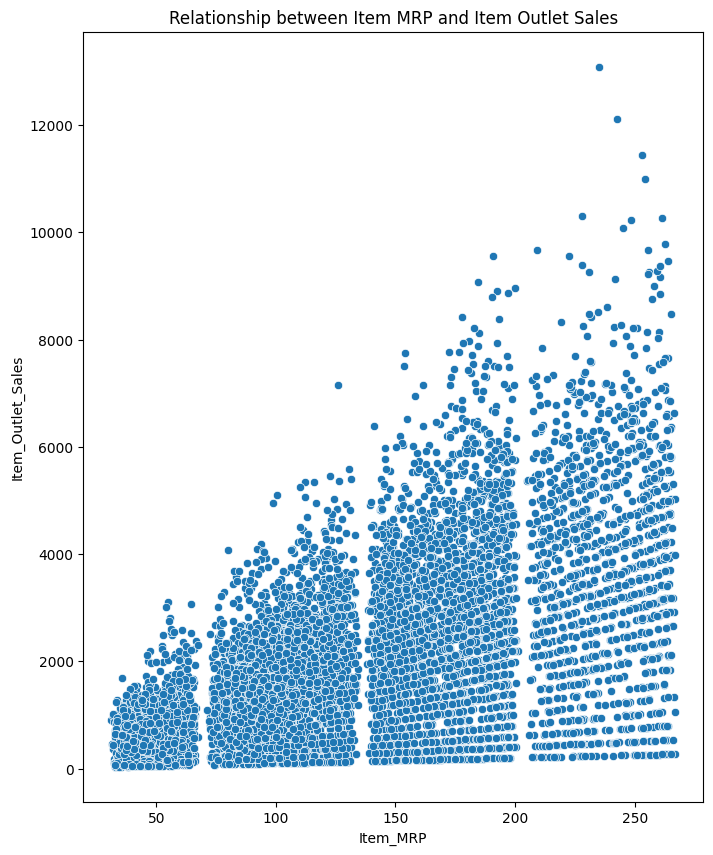

In [ ]:
# Graph Item_MRP and Item_Outlet Sales
fig, ax = plt.subplots(figsize=(8,10))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales').set(title='Relationship between Item MRP and Item Outlet Sales');

In [ ]:
line_kws = dict(color='black')
scatter_kws = dict(edgecolor='white')

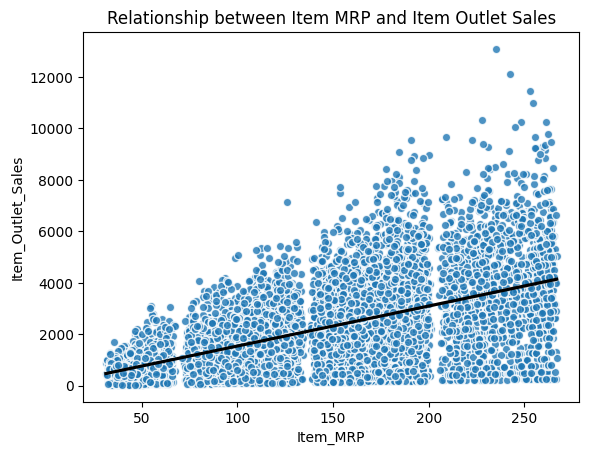

In [ ]:
ax = sns.regplot(data=df, x="Item_MRP", y="Item_Outlet_Sales", line_kws=line_kws, scatter_kws=scatter_kws)
ax.set_title('Relationship between Item MRP and Item Outlet Sales');

The scatterplot clearly shows the positive relationship of maximum retail prices of items and item outlet sales.

As maximum retail prices go up, item outlet sales also increase.

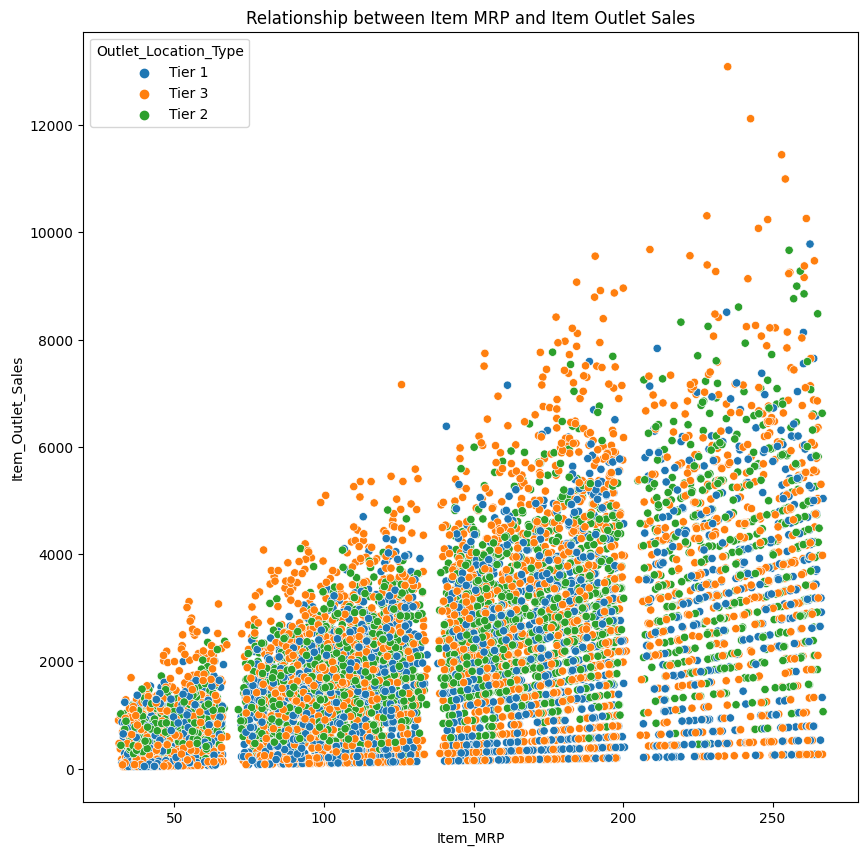

In [ ]:
# Graph Item_MRP and Item_Outlet Sales by Tier (Outlet Location Type)
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Location_Type').set(title='Relationship between Item MRP and Item Outlet Sales');

As per the graph above, the data seems to indicate that item outlet sales for some products sold in Tier 3 locations are usually scattered at the upper limits of each MRP, meaning maximum retail price is higher compared to other Tier locations or outlet location type.

For example at the 250 maximum retail price, we can see that the highest item outlet sales are from products sold in Tier 3 locations reaching even more than 12000.

In [ ]:
item_outlet_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
item_outlet_sales

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
item_outlet_sales.index

Index(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object', name='Item_Type')

In [ ]:
mean_sales = item_outlet_sales.index

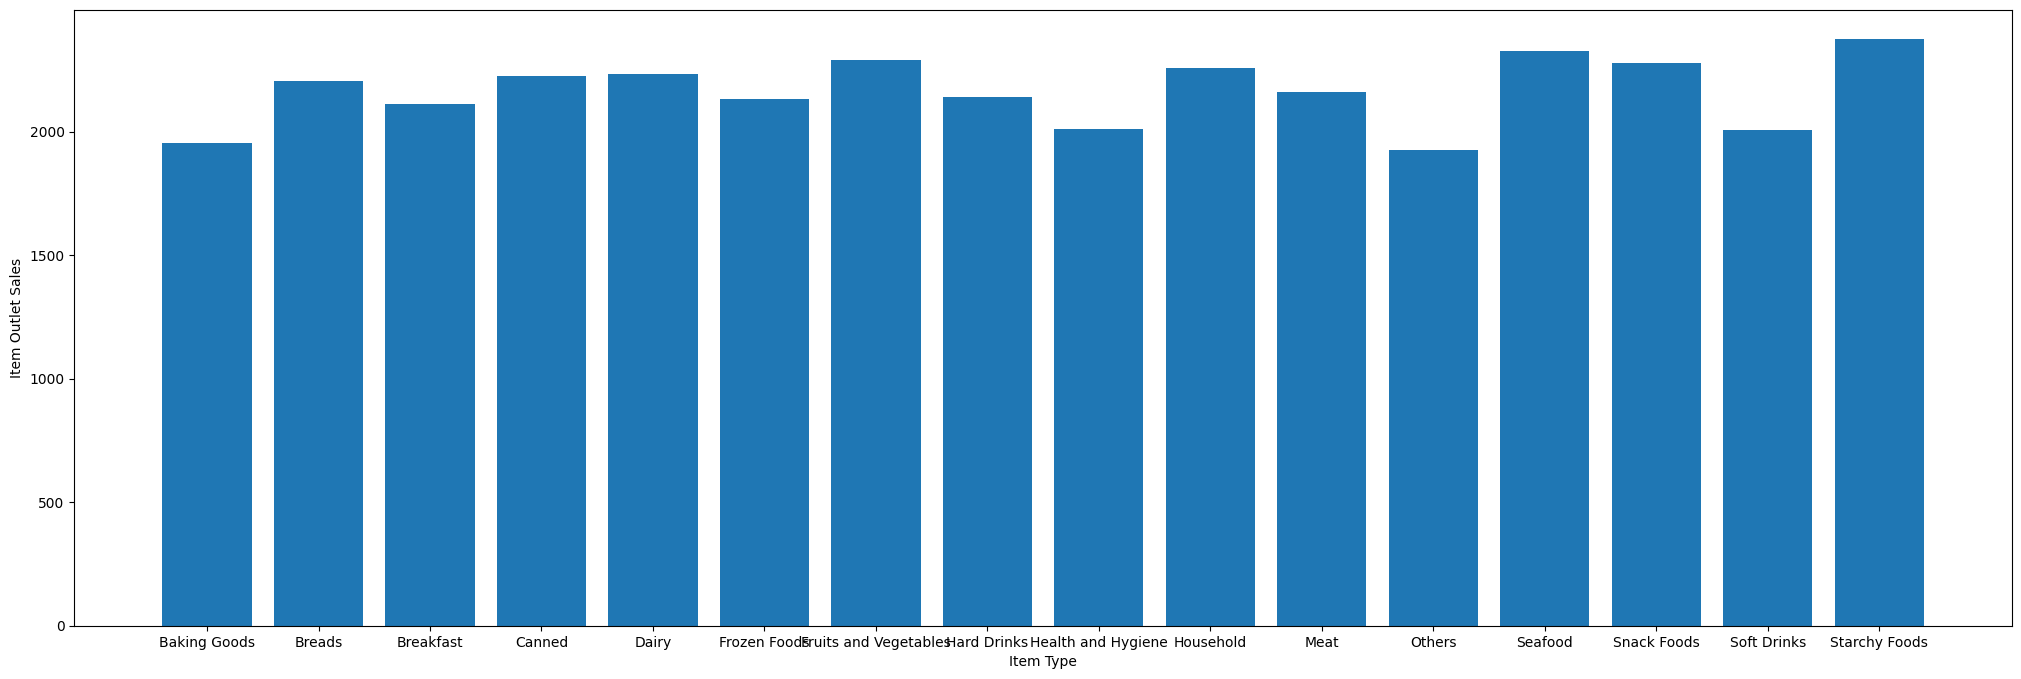

In [ ]:
fig, ax = plt.subplots(figsize=(30,8))
ax.bar(mean_sales,item_outlet_sales.values);
ax.set_ylabel('Item Outlet Sales')
ax.set_xlabel('Item Type');